In [35]:
%pylab inline
from PIL import Image
from astropy.io import fits
import pickle
import cv2
import os as os

Populating the interactive namespace from numpy and matplotlib


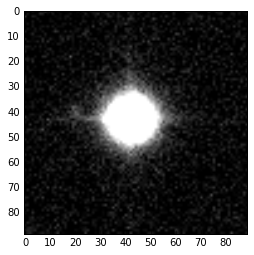

In [7]:
# Science will be the reference image
science = fits.getdata('./Fits/science.fits')
plt.imshow(Image.fromarray(science), cmap = 'gray')

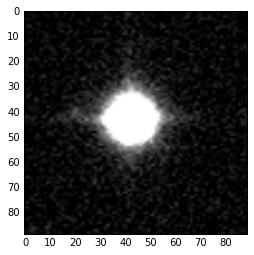

In [16]:
# Template will be be injected with transients
template = fits.getdata('./Fits/template.fits')
plt.imshow(Image.fromarray(template), cmap = 'gray')

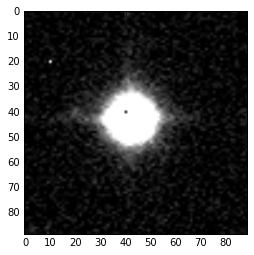

In [45]:
# a point transient inside the source and one outside 
template1 = template.copy()
template1[40,40] = 0.8*amin(template1)
template1[20,10] = 0.8*amax(template1)

if os.path.isfile("./Fits/template_points.fits"):
    os.remove("./Fits/template_points.fits")
fits.PrimaryHDU(template1).writeto("./Fits/template_points.fits")
plt.imshow(Image.fromarray(template1), cmap = 'gray')

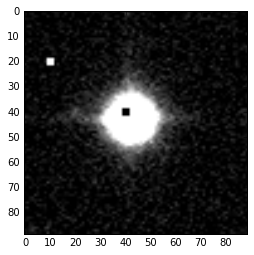

In [63]:
# Auxiliary functions to calculate create gaussians
def gaussian(x, mu, sigma):
    return exp( -(((x-mu)/(sigma))**2)/2.0 )

def get_gaussian(kernel_radius, sigma):
    hkernel = [gaussian(x, kernel_radius, sigma) for x in range(2*kernel_radius+1)]
    vkernel = [x for x in hkernel]
    kernel2d = [[xh*xv for xh in hkernel] for xv in vkernel]
    kernelsum = sum([sum(row) for row in kernel2d])
    kernel2d = [[x/kernelsum for x in row] for row in kernel2d]
    return array(kernel2d)


# a point transient inside the source and one outside 
template2 = template.copy()
gaussian = get_gaussian(1, 3.)

for i in range(3):
    for j in range(3):
        template2[39 + i, 39 + j] = 0.8*amin(template1)*gaussian[i, j]
        template2[19 + i, 9 + j] = 0.8*amax(template1)*gaussian[i, j]
if os.path.isfile("./Fits/template_gaussians.fits"):
    os.remove("./Fits/template_gaussians.fits")
fits.PrimaryHDU(template2).writeto("./Fits/template_gaussians.fits")
plt.imshow(Image.fromarray(template2), cmap = 'gray')